In [1]:
from knowknow import *

from load_db import db as dta

loading variable infosci-wos-filtered-grouped/_attributes from disk
loading variable infosci-wos-filtered-grouped/groups from disk
loading variable infosci-wos-filtered-grouped/group_reps from disk


In [19]:
from knowknow.viz import yearly_counts_table_simp

In [13]:
def key2name(tname, truncate=None):
    tstr = tname.split("|")
    if len(tstr) == 3:
        tstr = "%s (%s)\n%s" % (tstr[0], tstr[1], tstr[2])
    else:
        if tname in dd:
            yy = dd[tname][2]
        else:
            yy = str(dta.trend('c', tname).first) + "*"
        tstr = "%s (%s)\n%s" % (tstr[0], yy, tstr[1])
    tstr = tstr.lower()
    return tstr

In [2]:
top_df = stats.top_decade_stratified(dta, 'c', topN=20, maxP = 0.1, debug=False, yRange=(1940,2015))

loading variable infosci-wos-filtered-grouped/ind ___ c.fy from disk
loading variable infosci-wos-filtered-grouped/ind ___ fy from disk
(134, 12)


In [3]:
top_df.head()

,first,totalprop,name,maxpropy,maxcount,total,maxprop,maxcounty,last,type,first_added,pub
0,1988,0.020002,"Zuboff, S.|age smart machine fu",1993,16,283,0.001761,2015,2020,book,1989,NaN
1,1984,0.029258,"Ives, B.|1983|commun acm,v26,p785",1990,14,198,0.002724,1997,2020,article,1982,1983.0
2,1990,0.035227,"Yin, R.|case study res desig",1999,86,1077,0.002125,2020,2020,book,1990,NaN
3,1963,0.151099,"Fussler, H.|patterns use books l",1966,7,81,0.021739,1992,2020,book,1957,NaN
4,1972,0.042266,"Hayes, R.|hdb data processing",1973,6,25,0.019608,1973,2011,book,1970,NaN


In [4]:
dd = {}

In [5]:
def key2name(tname, truncate=None):
    tstr = tname.split("|")
    if len(tstr) == 3:
        tstr = "%s (%s)\n%s" % (tstr[0], tstr[1], tstr[2])
    else:
        if tname in dd:
            yy = dd[tname][2]
        else:
            yy = dta.trend('c', tname).first
        tstr = "%s (%s)\n%s" % (tstr[0], yy, tstr[1])
    tstr = tstr.lower()
    return tstr

In [7]:
names = sorted(_df_df['name'])

yearlim=(1920,2015)
print_names= {k: key2name(k) for k in top_df['name']}
tickstep=30

# Top 20 cited works in each decade

In [10]:
NCOLS = 3

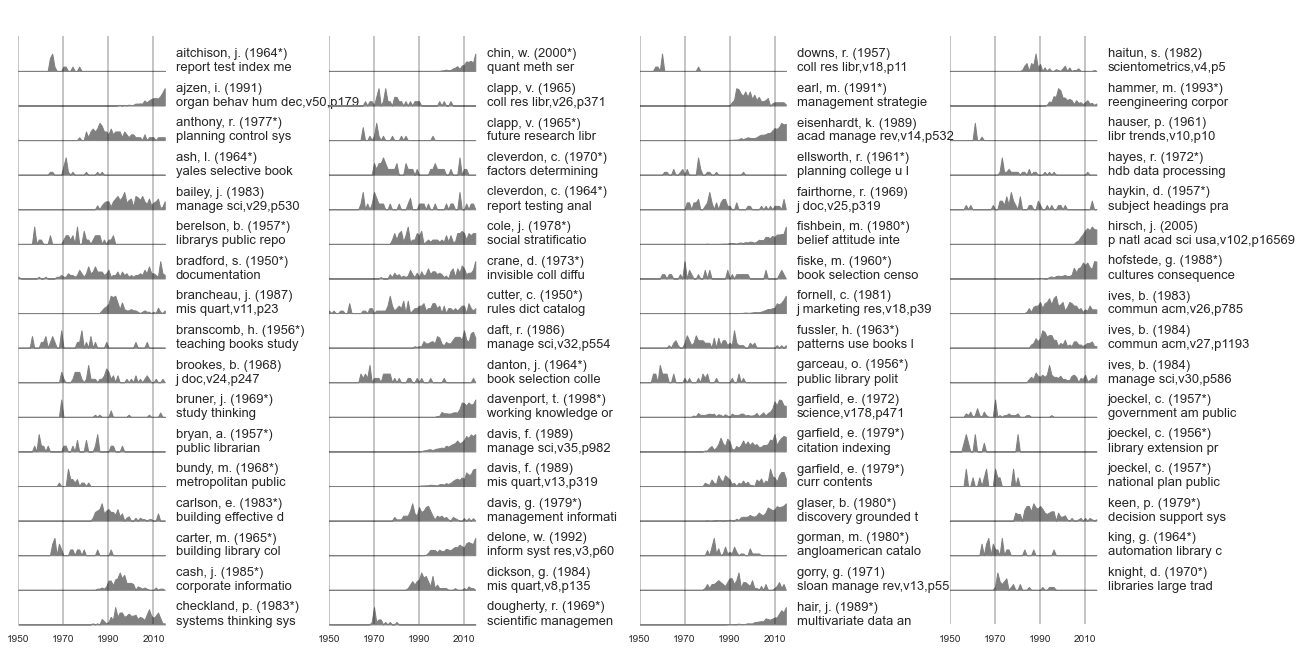

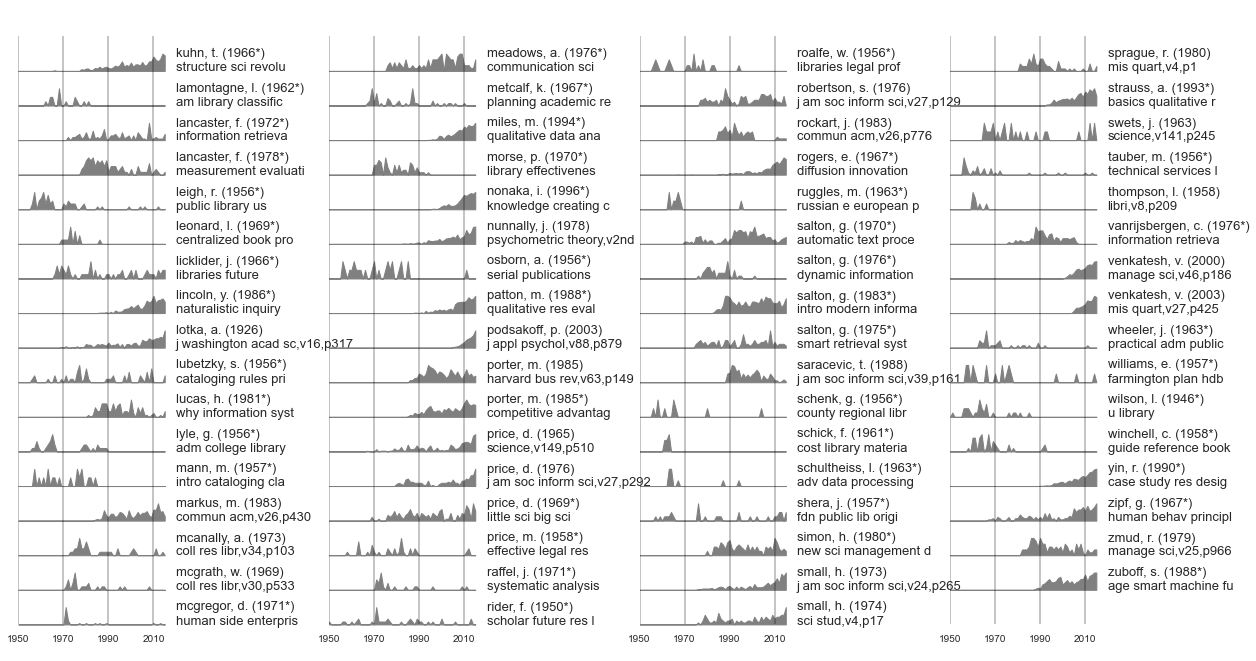

In [22]:
NPAGES = 2
nper = len(names) // NPAGES + int(len(names)%NPAGES != 0)
for i in range(NPAGES):
    mynames = names[i*nper:(i+1)*nper]
    knowknow.viz.yearly_counts_table_simp(dta, mynames, NCOLS=4, print_names={k:key2name(k) for k in mynames}, yearlim=(1950,2015))
    plt.savefig('top20.nomark.%s.png'%i)

In [14]:
mk = {r['name']:(r.first_added,r.first_added+10) for i,r in top_df.iterrows()}

In [15]:
len(names)

134

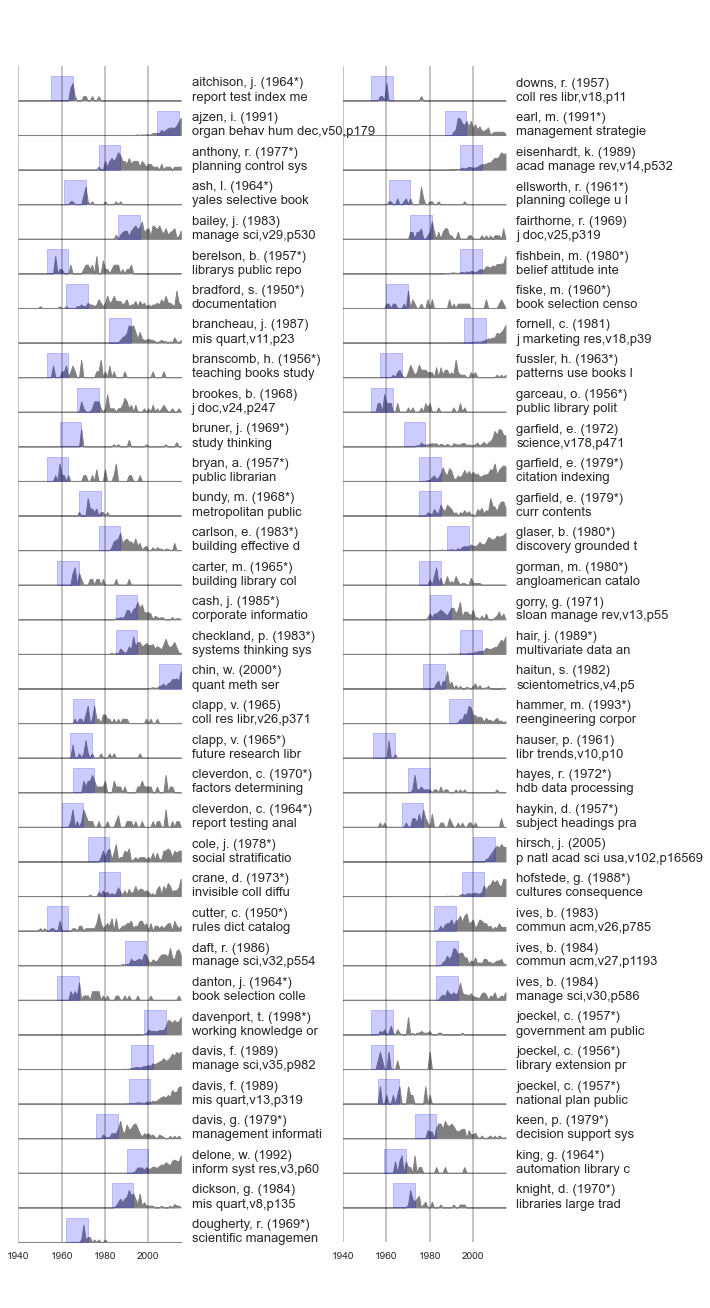

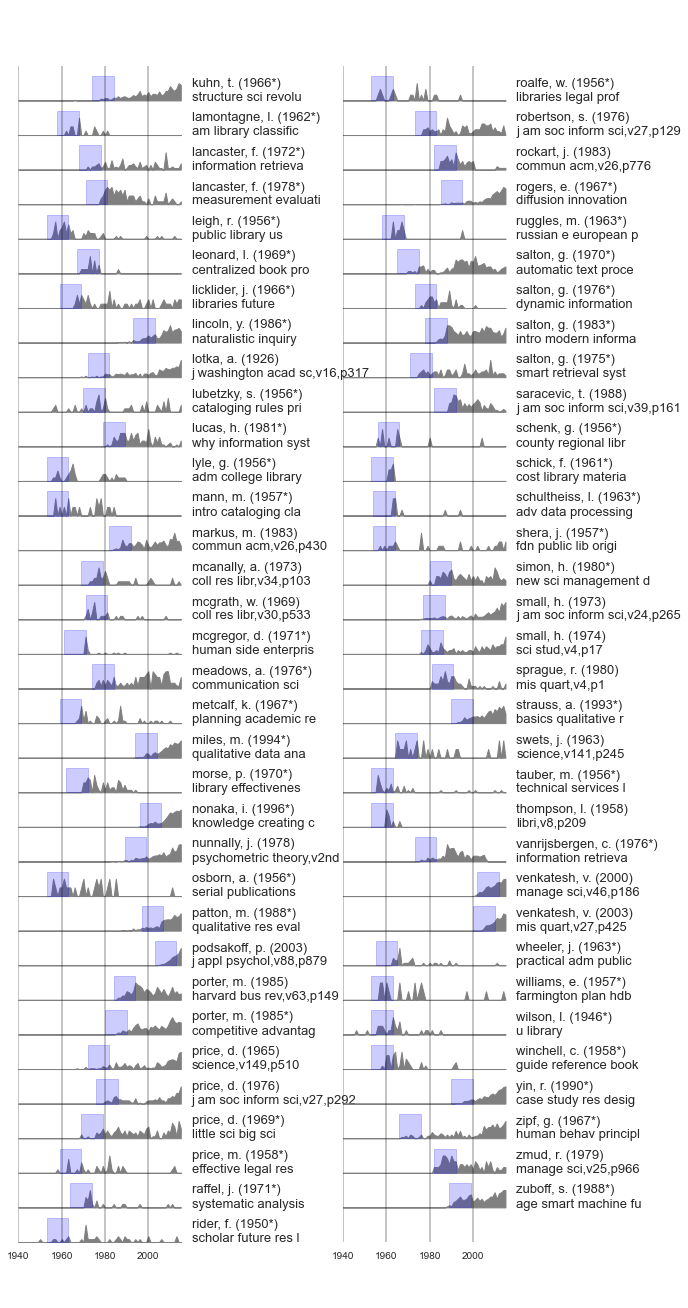

In [16]:
NPAGES = 2
nper = len(names) // NPAGES + int(len(names)%NPAGES != 0)
for i in range(NPAGES):
    mynames = names[i*nper:(i+1)*nper]
    knowknow.viz.yearly_counts_table_simp(dta, mynames, NCOLS=2, print_names={k:key2name(k) for k in mynames}, markranges=mk, yearlim=(1940,2015))
    plt.savefig('top20.longer.%s.png'%i)

In [105]:
without_many_now = []
total = 0

for n in names:
    t = dta.trend('c', n)
    tot = t.sum_between(2000,2015)
    if t.first >= 1960:
        continue
        
    total += 1
    if tot < 10:
        without_many_now.append(n)
        continue

In [106]:
total

56

In [107]:
len(without_many_now)

11

In [108]:
11/56

0.19642857142857142

In [116]:
parts = []
for x in without_many_now:
    tt = dta.trend('c', x)
    c = tt.sum_between(2000,2015)
    parts.append( "%s (%s)" % (
        x.split(",")[0],
        "%s; %s citation%s" %(
            'd',
            c,
            "s" if c > 1 else "",
            #tt.first # , first cited in %s
        )
    ) )

In [117]:
", ".join(parts)

'Burgess (d; 4 citations), Centers (d; 8 citations), Davis (d; 9 citations), Dollard (d; 9 citations), Hollingshead (d; 8 citations), Linton (d; 8 citations), Loomis (d; 1 citation), Maciver (d; 6 citations), Newcomb (d; 7 citations), Smith (d; 1 citation), Terman (d; 3 citations)'